In [1]:
pip install pandas numpy matplotlib statsmodels scikit-learn


In [5]:
import pandas as pd


excel_file = "/content/BlinkIT Grocery Data.xlsx"

df = pd.read_excel(excel_file)


csv_file = "BlinkIT_Grocery_Data.csv"
df.to_csv(csv_file, index=False)

print(f"Excel file converted to CSV: {csv_file}")


Excel file converted to CSV: BlinkIT_Grocery_Data.csv


In [6]:
import pandas as pd

file_path = "/content/BlinkIT Grocery Data.xlsx"  # or BlinkIT Grocery Data.csv


if file_path.endswith('.xlsx'):
    df = pd.read_excel(file_path)
elif file_path.endswith('.csv'):
    df = pd.read_csv(file_path)
else:
    raise ValueError("Unsupported file format")

print("File loaded successfully!")
print(df.head())


File loaded successfully!
  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket T

In [7]:
import pandas as pd


df = pd.read_csv("/content/BlinkIT_Grocery_Data.csv")

sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()


sales_by_year.columns = ['Year', 'Sales']

print(sales_by_year)

   Year        Sales
0  2011   78131.5666
1  2012  130476.8598
2  2014  131809.0156
3  2015  130942.7802
4  2016  132113.3698
5  2017  133103.9070
6  2018  204522.2570
7  2020  129103.9604
8  2022  131477.7764


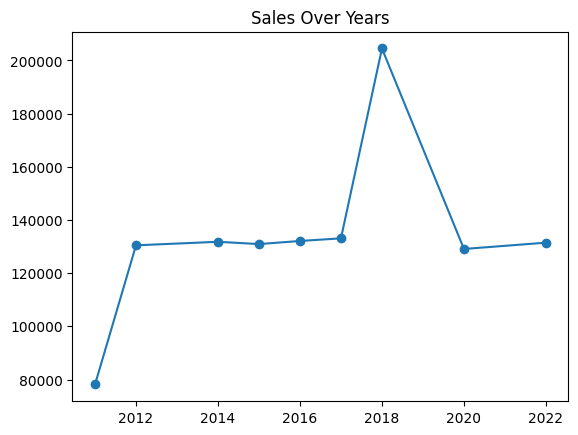

Forecasted Sales: 9     129149.198168
10    126917.435585
11    124778.463333
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be give

In [8]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


sales_by_year.set_index('Year', inplace=True)


plt.plot(sales_by_year['Sales'], marker='o')
plt.title('Sales Over Years')
plt.show()


model = ARIMA(sales_by_year['Sales'], order=(1,1,1))
model_fit = model.fit()


forecast = model_fit.forecast(steps=3)
print("Forecasted Sales:", forecast)


In [9]:
from sklearn.ensemble import IsolationForest


sales_reset = sales_by_year.reset_index()


iso = IsolationForest(contamination=0.05, random_state=42)
sales_reset['Anomaly'] = iso.fit_predict(sales_reset[['Sales']])


anomalies = sales_reset[sales_reset['Anomaly'] == -1]
print(anomalies)


   Year       Sales  Anomaly
6  2018  204522.257       -1


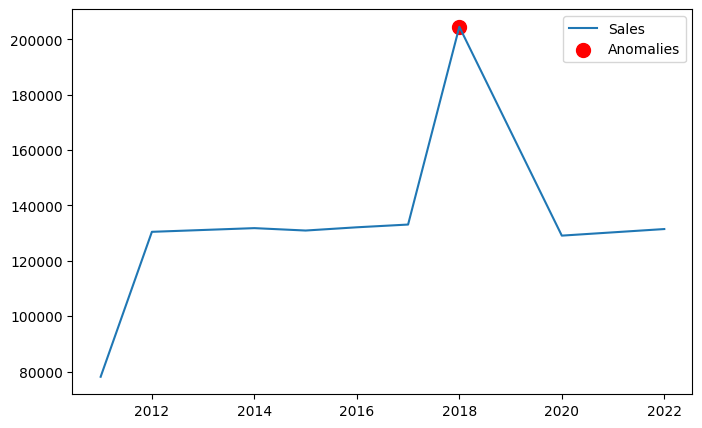

In [10]:
plt.figure(figsize=(8,5))
plt.plot(sales_reset['Year'], sales_reset['Sales'], label='Sales')
plt.scatter(anomalies['Year'], anomalies['Sales'], color='red', label='Anomalies', s=100)
plt.legend()
plt.show()
